In [1]:
#Importing the libraries 
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Getting the data 

cifar_data = tf.keras.datasets.cifar10

In [3]:
#Train test data loading 

(X_train , y_train) , (X_test , y_test) = cifar_data.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
#Checking the data shapes 

print('The shape of the training features is ' , X_train.shape)
print('The shape of the testing features is ' , X_test.shape)
print('The shape of the training labels is ' , y_train.shape)
print('The shape of the testing labels is ' , y_test.shape)

The shape of the training features is  (50000, 32, 32, 3)
The shape of the testing features is  (10000, 32, 32, 3)
The shape of the training labels is  (50000, 1)
The shape of the testing labels is  (10000, 1)


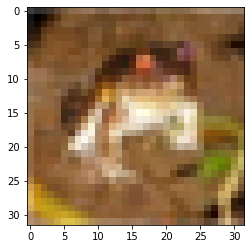

The label is [6]


In [8]:
#Inspecting random images 

plt.imshow(X_train[0])
plt.show()
print('The label is' , y_train[0])

In [9]:
#Scaling the feature data 

X_train = X_train/255
X_test = X_test/255

In [10]:
#Inspecting a random image 
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
#Encoding the labels 

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [31]:
#Creating the model

cnn_model = tf.keras.models.Sequential()

In [32]:
#Adding layers to the model 

#Adding a convolutional layer 
cnn_model.add(tf.keras.layers.Conv2D(filters = 30 , 
                                     kernel_size = (4,4) , 
                                     input_shape = (32,32,3),
                                     activation = 'relu'
                                    ))

In [33]:
#Adding a pooling layer 
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

In [34]:
#Adding a second convolutional layer 
cnn_model.add(tf.keras.layers.Conv2D(filters = 20 , 
                                     kernel_size = (4,4) , 
                                     input_shape = (32,32,3),
                                     activation = 'relu'
                                    ))

In [35]:
#Adding a second  pooling layer 
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

In [36]:
#Flatten layer 

cnn_model.add(tf.keras.layers.Flatten())

In [37]:
#First dense layer 

cnn_model.add(tf.keras.layers.Dense(units = 240 , activation = 'relu'))


In [38]:
#Final dense layer 

cnn_model.add(tf.keras.layers.Dense(units = 10 , activation = 'softmax'))

#We use softmax for multiclass classification 

In [39]:
#Compiling the model

cnn_model.compile(optimizer='SGD' , metrics=['accuracy'] , loss = 'categorical_crossentropy')

#here we are additionally monitoring accuracy 
#categorical cross entropy is used for the sake of multiclass classification

In [40]:
#Early stopping 

estop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 2)

In [42]:
#Fitting the model

cnn_model.fit(x = X_train , y = y_train_encoded , epochs=12 , callbacks= [estop] , verbose = 0 , 
             validation_data= (X_test , y_test_encoded))

In [44]:
#Creating a metrics dataframe 
metrics = pd.DataFrame(cnn_model.history.history)

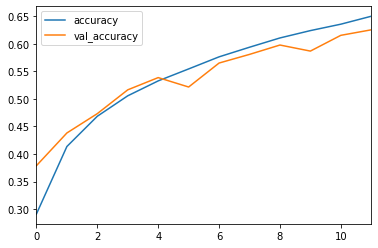

In [47]:
#Plotting the accuracy 

metrics[['accuracy' , 'val_accuracy']].plot()

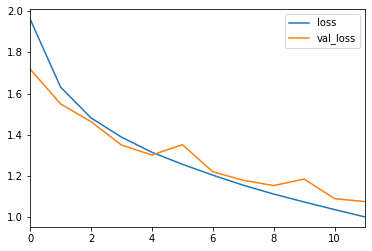

In [48]:
#plotting the loss
metrics[['loss' , 'val_loss']].plot()

In [49]:
#Evaluating the model
cnn_model.evaluate(X_test , y_test_encoded)

10000/10000 [==============================] - 9s 888us/sample - loss: 1.0756 - accuracy: 0.6254


[1.0756496673583984, 0.6254]

In [50]:
#Making predictions 

preds = cnn_model.predict_classes(X_test)

In [51]:
#Classification metrics

from sklearn import metrics

In [52]:
#Classification report 

print(metrics.classification_report(preds , y_test))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65       762
           1       0.70      0.78      0.74       893
           2       0.33      0.67      0.45       498
           3       0.47      0.43      0.45      1096
           4       0.67      0.50      0.58      1338
           5       0.58      0.52      0.55      1104
           6       0.72      0.72      0.72      1001
           7       0.65      0.73      0.69       889
           8       0.83      0.63      0.72      1308
           9       0.72      0.65      0.68      1111

    accuracy                           0.63     10000
   macro avg       0.63      0.64      0.62     10000
weighted avg       0.65      0.63      0.63     10000



In [53]:
#Confusion matrix 

print(metrics.confusion_matrix(preds , y_test))

[[574  17  50  13  19   8   5   9  48  19]
 [ 25 698  11  11   1   7   9   2  29 100]
 [ 42   3 334  32  24  22  17  13   4   7]
 [ 28  18 116 475  77 193  85  54  25  25]
 [ 52   6 198 110 673  69  87 115  13  15]
 [ 15   6 117 191  50 578  27 103  10   7]
 [ 13   8  84  62  54  32 723   9   3  13]
 [ 12   5  38  32  58  55  13 650   8  18]
 [184  77  30  42  30  19  14  11 827  74]
 [ 55 162  22  32  14  17  20  34  33 722]]
